## Task 4.9. Part 2.

In [19]:
### Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
### Set path
path=r'C:\Users\User\Achievement4\Data'

In [3]:
### Import dataframe (data set with new customer data)
ords_cust = pd.read_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers.pkl'))

In [7]:
ords_cust.columns

Index(['product_id', 'product_name', 'department_id', 'prices', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'hour_of_day',
       'days_since_prior_order', 'first_order', 'reordered', 'busiest_day',
       'max_order', 'loyalty_flag', 'avg_price', 'spending_flag',
       'median_days', 'frequency_flag', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

In [5]:
ords_cust.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day,days_since_prior_order,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3.0,...,Charles,Cox,Male,Minnesota,81,2019/08/01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20.0,...,Charles,Cox,Male,Minnesota,81,2019/08/01,1,married,49620,both
2,1,Chocolate Sandwich Cookies,19,5.8,389851,709,2,0,21,6.0,...,Deborah,Glass,Female,Vermont,66,2018/06/16,2,married,158302,both
3,1,Chocolate Sandwich Cookies,19,5.8,652770,764,1,3,13,NaN,...,Heather,Myers,Female,Wisconsin,40,2020/02/09,3,married,31308,both
4,1,Chocolate Sandwich Cookies,19,5.8,1813452,764,3,4,17,9.0,...,Heather,Myers,Female,Wisconsin,40,2020/02/09,3,married,31308,both


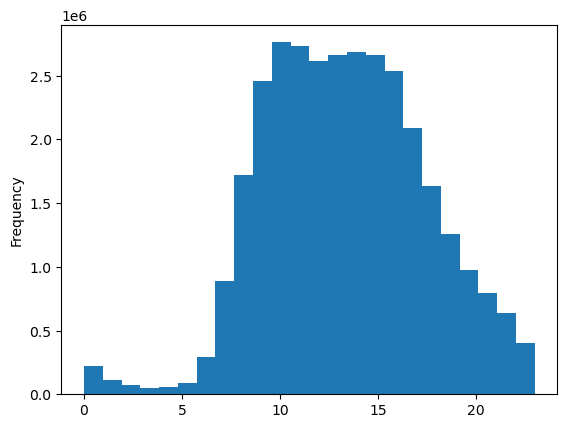

In [6]:
### 3. Creating a histogram of the “order_hour_of_day” column
hist = ords_cust['hour_of_day'].plot.hist(bins = 24)

### The graph shows that peak sales occur between 9am and 4pm. 

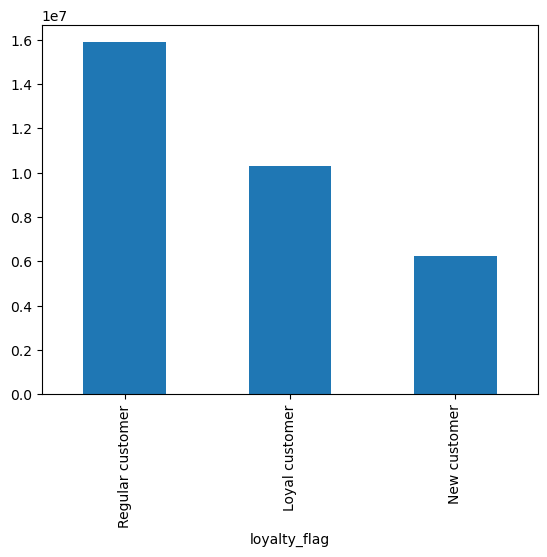

In [8]:
### 4. Creating a bar chart from the “loyalty_flag” column
bar = ords_cust['loyalty_flag'].value_counts().plot.bar()

In [9]:
### 5. Create a random sample by generating a seed
np.random.seed(4)

In [11]:
### Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(ords_cust)) <= 0.7

In [12]:
### Split the dataframe into two samples
big = ords_cust[dev]
small = ords_cust[~dev]

In [13]:
### Compare the dataframe length to the sum of the big and small samples
len(ords_cust)

32404859

In [14]:
len(big) + len(small)

32404859

In [16]:
### Reduce the samples to only the columns needed
ords_cust2 = small [['hour_of_day','prices']]

In [17]:
### Checking the subset
ords_cust2.head()

,hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


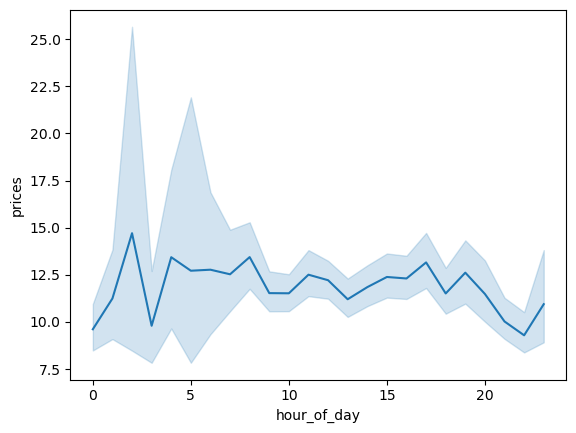

In [20]:
### Create a line chart
line = sns.lineplot(data = ords_cust2, x = 'hour_of_day',y = 'prices')

In [21]:
### 6. Reduce previously made sample to only the columns needed for creating line chart 
ords_cust3 = small [['age','n_dependants']]

In [22]:
### Checking the subset
ords_cust3.head()

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


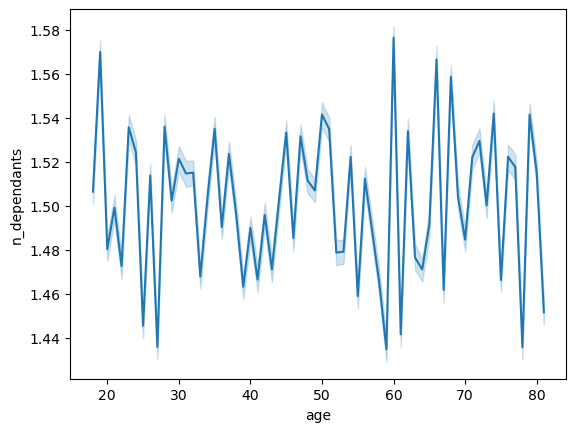

In [23]:
# Create a line chart exploring the connections between age and number of dependents:
line_2 = sns.lineplot(data = ords_cust3, x = 'age',y = 'n_dependants')

### I don't see any patterns showing relationship between age and number of dependants

In [25]:
### 7. Reduce previously made sample to only the columns needed
ords_cust4 = small [['age','income']]

In [26]:
### Checking the subset
ords_cust4.head()

,age,income
0,81,49620
2,66,158302
3,40,31308
6,20,34171
10,61,42573


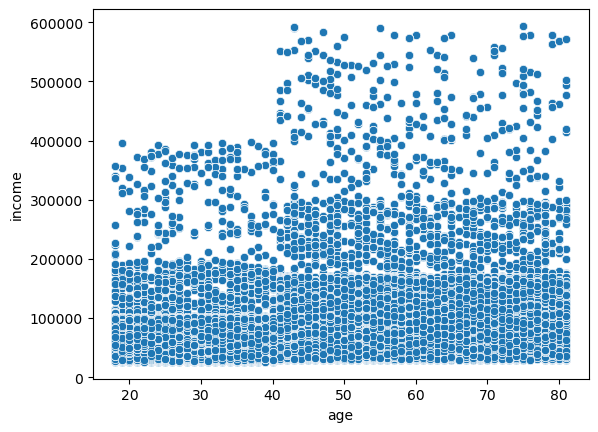

In [27]:
### Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = ords_cust4)

### This pattern suggests that income tends to increase with age for many individuals. The majority of incomes seem to cluster below 300,000 across all ages.A smaller proportion of individuals have incomes above 300,000, which become more frequent with increasing age.

In [30]:
### Set path for exporting visualizations
path2 = r'C:\Users\User\Achievement4\Analysis\Visualisations'


In [31]:
### 8.Exporting visualizations as “.png” files in  relevant project folder
hist.figure.savefig(os.path.join(path2, 'hist_hour_of_day_frequency.png'))
bar.figure.savefig(os.path.join(path2, 'bar_loyalty_flag.png'))
line.figure.savefig(os.path.join(path2, 'line_price_hours_of_the_day.png'))
line_2.figure.savefig(os.path.join(path2, 'age_n_dependants.png'))
scatterplot.figure.savefig(os.path.join(path2, 'change_in_spending_power_over_age.png'))